## Mini Project: Data Visualization

### Task


#### **Data Loading and Cleaning:**
- Load the dataset using Pandas.
- Perform basic data cleaning (handling missing values, incorrect data types, etc.).


In [1]:
### download and extract chinook sample DB
import urllib.request
import zipfile
from functools import partial
import os
import pandas as pd

file_path = 'datasets/penguins.csv'
dir_path = os.path.dirname(file_path)

if not os.path.exists(dir_path):
    os.makedirs(dir_path)

ds_url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
if not os.path.exists(file_path):
    print('downloading penguins.csv')
    with urllib.request.urlopen(ds_url) as response:
        with open(file_path, 'wb') as f:
            f.write(response.read())


In [2]:
df = pd.read_csv(file_path)

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [5]:
df[df.bill_length_mm.isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


In [6]:
df.dropna(subset=['bill_length_mm'], inplace=True)

In [7]:
# Let's simply mark missing values as 'undefined'
df.loc[df.sex.isnull(), 'sex'] = 'undefined'


#### **Exploratory Data Analysis (EDA):**
- Use Pandas to summarize the key statistics of the dataset.
- Identify unique values, ranges, and distribution of data.


In [8]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,342,342,342.000000,342.000000,342.000000,342.000000,342,342.000000
unique,3,3,NaN,NaN,NaN,NaN,3,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,151,167,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029240
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.817168
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [9]:
df.species.value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [10]:
df.island.value_counts()


island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [11]:
df.sex.value_counts()


sex
male         168
female       165
undefined      9
Name: count, dtype: int64

#### **Visualization Tasks:**
1. Species Distribution: Use a bar chart to show the distribution of penguin species.
2. Flipper Length vs. Body Mass: Create a scatter plot to analyze the relationship between flipper length and body mass, color-coded by species.
3. Island Distribution: Visualize the count of penguins on each island using a pie chart.
4. Sex Distribution within Species: Create grouped bar charts showing the distribution of sex within each penguin species.
5. Heatmap of Correlations: Plot a heatmap to visualize the correlations between numerical variables.
6. Boxplots for Measurements: Generate boxplots for flipper length, body mass, and bill measurements, segmented by species.
7. Histograms of Measurements: Create histograms to show the distribution of key measurements (bill length, bill depth, flipper length).


In [12]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

1. Species Distribution

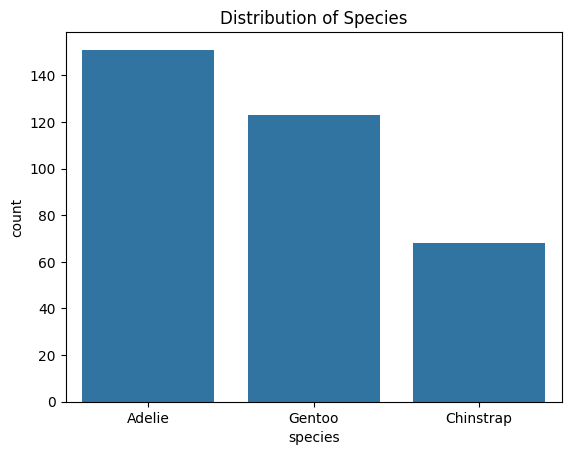

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='species')
plt.title('Distribution of Species')

plt.show()

There are noticebly less samples of the CHinstrap species compared to other

2. Flipper Length vs. Body Mass:

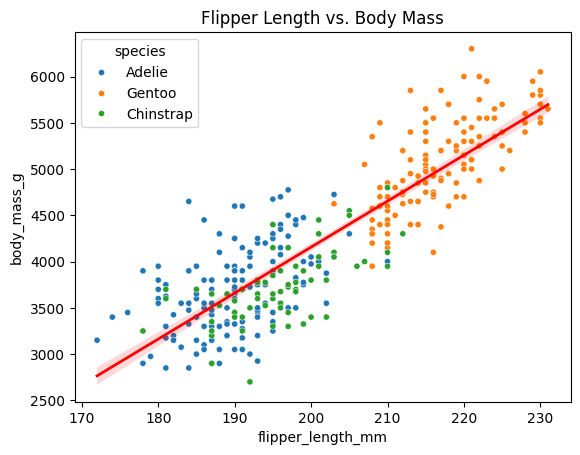

In [14]:
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species', s=20)
sns.regplot(data=df, x='flipper_length_mm', y='body_mass_g', scatter=False,
            color='red', line_kws={'linewidth': 2})
plt.title('Flipper Length vs. Body Mass')

plt.show()

We can see that flipper length and body mass are positively correlated. \
And almost all members of the Gentoo species have greater body mass and flipper length than other species.


3. Island Distribution

In [15]:
df.island.value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

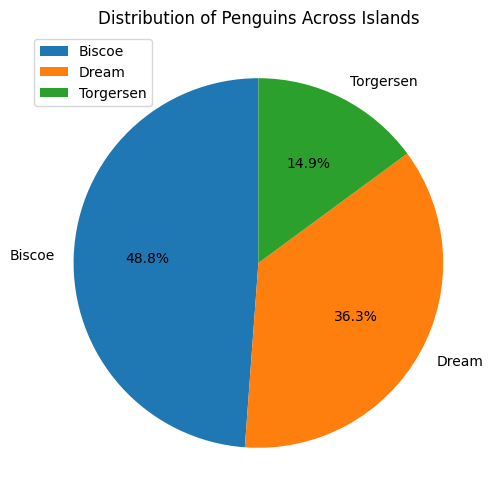

In [16]:
# Visualize the count of penguins on each island using a pie chart
plt.figure(figsize=(8, 6))
island_counts = df['island'].value_counts()
plt.pie(island_counts.values, labels=island_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Penguins Across Islands')
plt.legend()

plt.show()


Almost half of the samples comes 

In [17]:
import plotly.express as px

sunburst_data = df.groupby(['island', 'species']).size().reset_index(name='count')

fig = px.sunburst(sunburst_data, 
                  path=['island', 'species'], 
                  values='count',
                  title='Distribution of Penguin Species Across Islands',
                  height=600, width=600)

fig.show()


Here we can see that Adelie species are present on every island so we could investigate if there are any interesting diffenece between them (mb later :))

4. Sex Distribution within Species

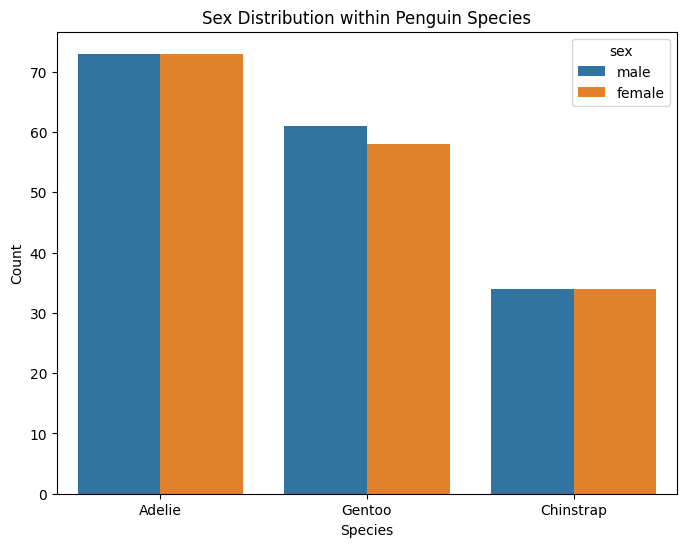

In [18]:
# Create a grouped bar chart for sex distribution within species
plt.figure(figsize=(8, 6))
sns.countplot(data=df[df.sex != 'undefined'], x='species', hue='sex')
plt.title('Sex Distribution within Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')

plt.show()


We have equal distribution of sex between all species

5. Heatmap of Correlations

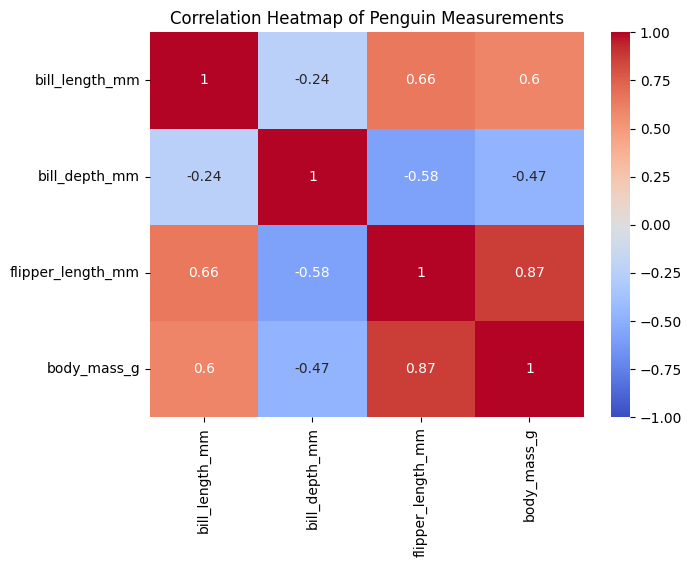

In [19]:
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Penguin Measurements')

plt.show()


We see the highest relationship between mass of the penguing and their flipper lenghts. \ 
Despite seeing moderate correlation between bill length and flipper length with body mass 
there is not high but still noticeable negative correlation between bill depth and previously mentioned parameners. \
I would expect that the bigger the penguin (i.e. body mass and flipper length) the bigger its bill should be (both length and depth). However, we seeing the oposite.


6. Boxplots for Measurements

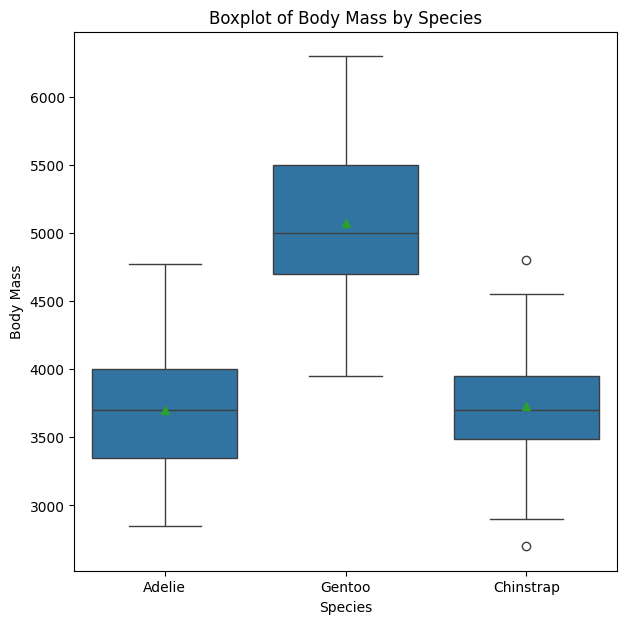

In [20]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=df, x='species', y='body_mass_g', showmeans=True)
plt.title('Boxplot of Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass')

plt.show()

Bill lenght of Chinstrap and Adeile have similar median values although Chinstrap has tighter spread. \
Gento species mass distribution has much higher mean that others with greater iqr and a littel skewness to the right 

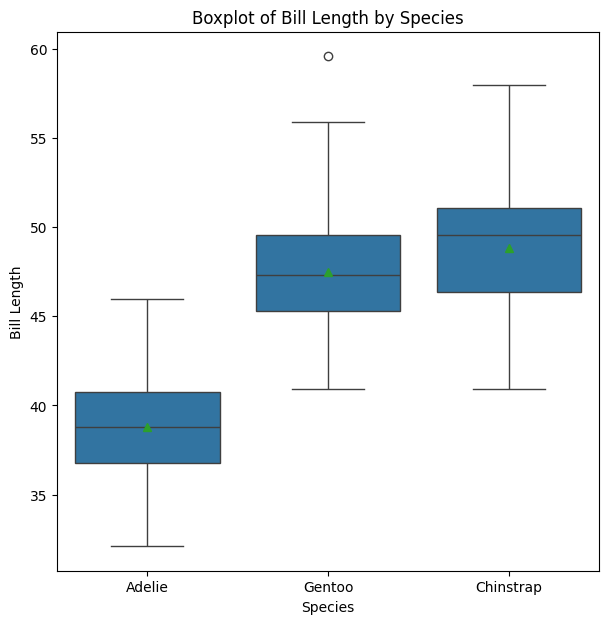

In [33]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=df, x='species', y='bill_length_mm', showmeans=True)
plt.title('Boxplot of Bill Length by Species')
plt.xlabel('Species')
plt.ylabel('Bill Length')

plt.show()

We observe that the mean bill length of the Adelie species is much smaller than that of the other species.  
The Gentoo and Chinstrap distributions appear quite similar, but the Chinstrap distribution is left-skewed and has a higher median.

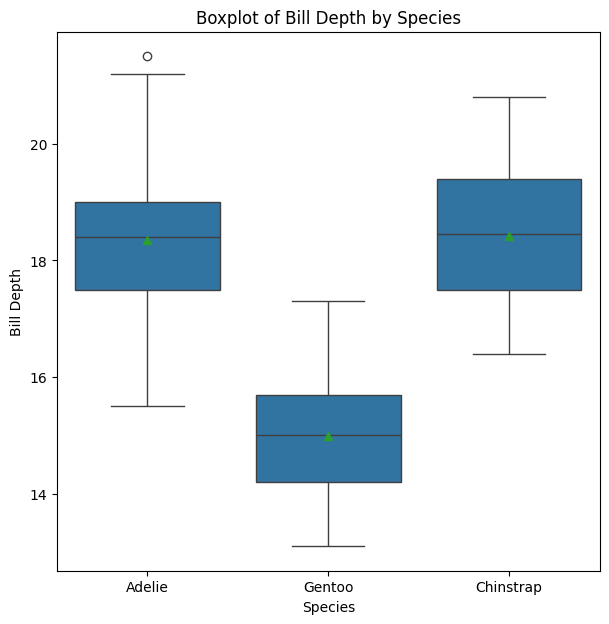

In [34]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=df, x='species', y='bill_depth_mm', showmeans=True)
plt.title('Boxplot of Bill Depth by Species')
plt.xlabel('Species')
plt.ylabel('Bill Depth')

plt.show()

Gento species mean is lower than others.

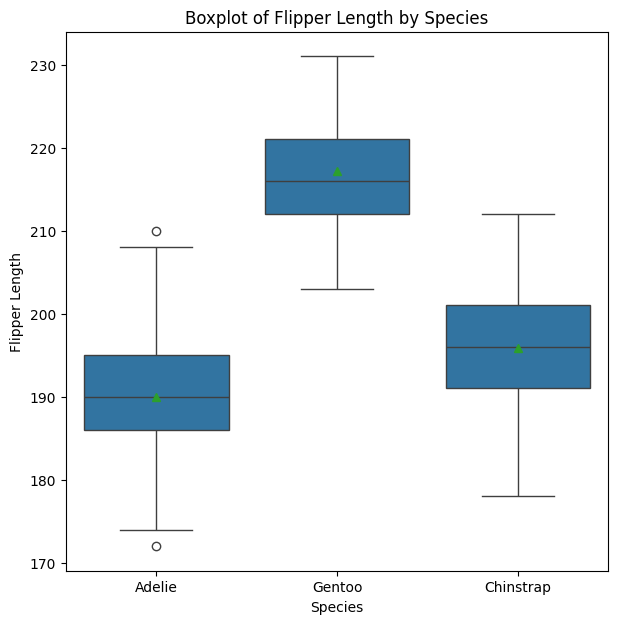

In [36]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=df, x='species', y='flipper_length_mm', showmeans=True)
plt.title('Boxplot of Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length')

plt.show()

Here we observe quite narrow iqr for all species with Gentoo haviing highes mean. 

7. Histograms of Measurements

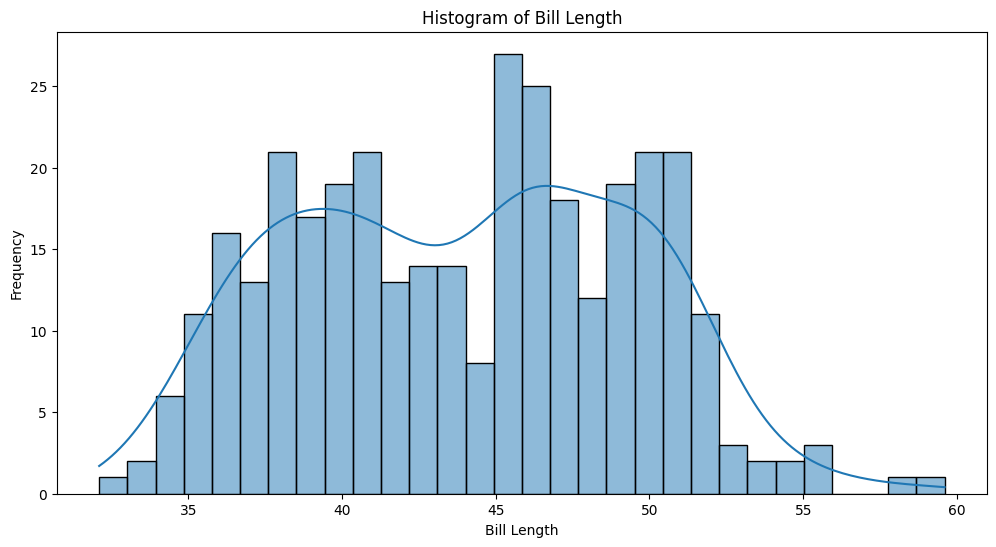

In [24]:
# Create histograms to show the distribution of key measurements (bill length, bill depth, flipper length).

plt.figure(figsize=(12, 6))
sns.histplot(df['bill_length_mm'], bins=30, kde=True)
plt.title('Histogram of Bill Length')
plt.xlabel('Bill Length')
plt.ylabel('Frequency')

plt.show()

The bill length distribution appears to be roughly normal, but with two distinct peaks.

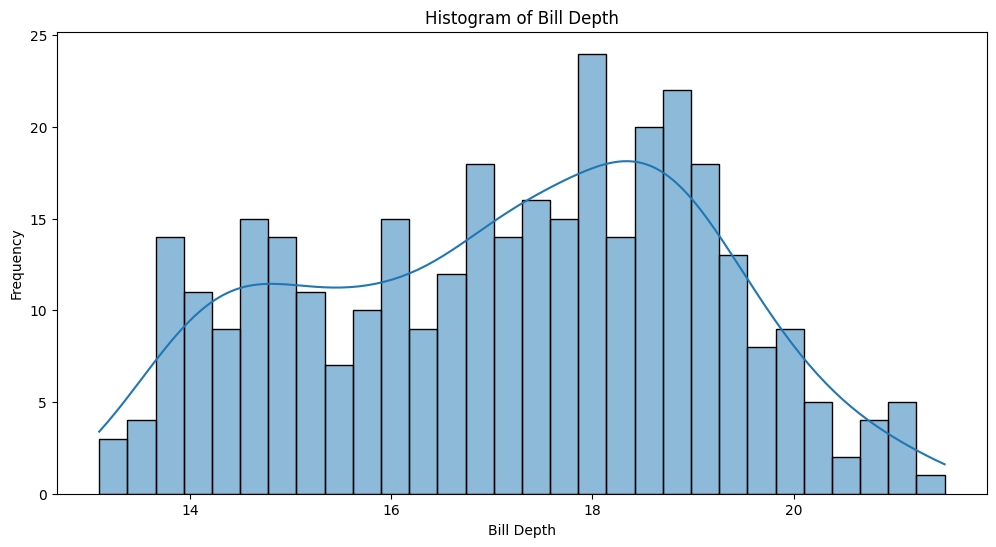

In [25]:

plt.figure(figsize=(12, 6))
sns.histplot(df['bill_depth_mm'], bins=30, kde=True)
plt.title('Histogram of Bill Depth')
plt.xlabel('Bill Depth')
plt.ylabel('Frequency')

plt.show()


This distribution is similar to the previous one but with less pronounced peaks.

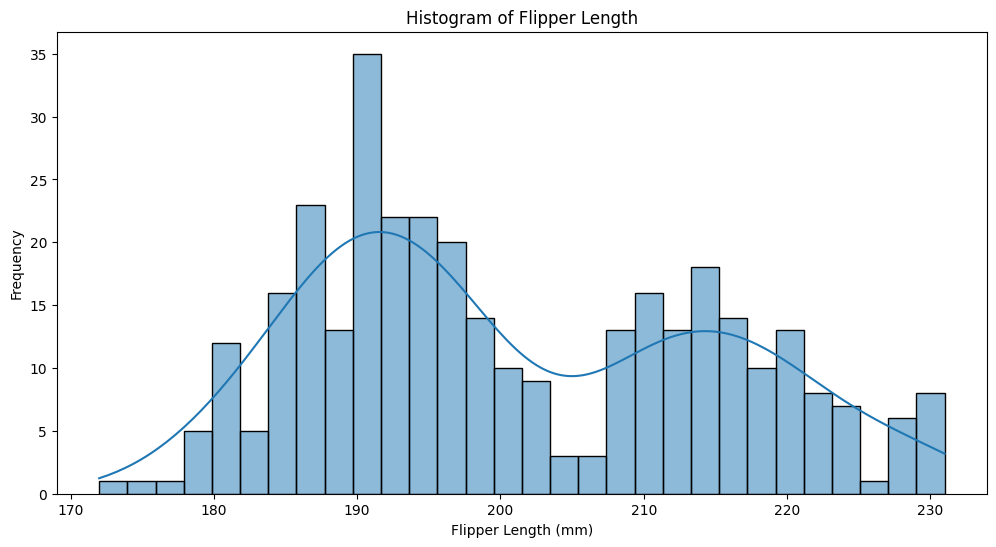

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(df['flipper_length_mm'], bins=30, kde=True)
plt.title('Histogram of Flipper Length')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')

plt.show()


Also similar distribution with two peaks. The first one being quite higher than the second.


**Insightful Visualizations:**
- Combine multiple plots into a single figure (using subplots) to compare different aspects of the data.
- Use Seaborn’s pairplot to visualize pairwise relationships in the dataset.

In [27]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [28]:
df.year.value_counts()

year
2009    119
2008    114
2007    109
Name: count, dtype: int64

In [29]:
measurements = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


<Figure size 1000x600 with 0 Axes>

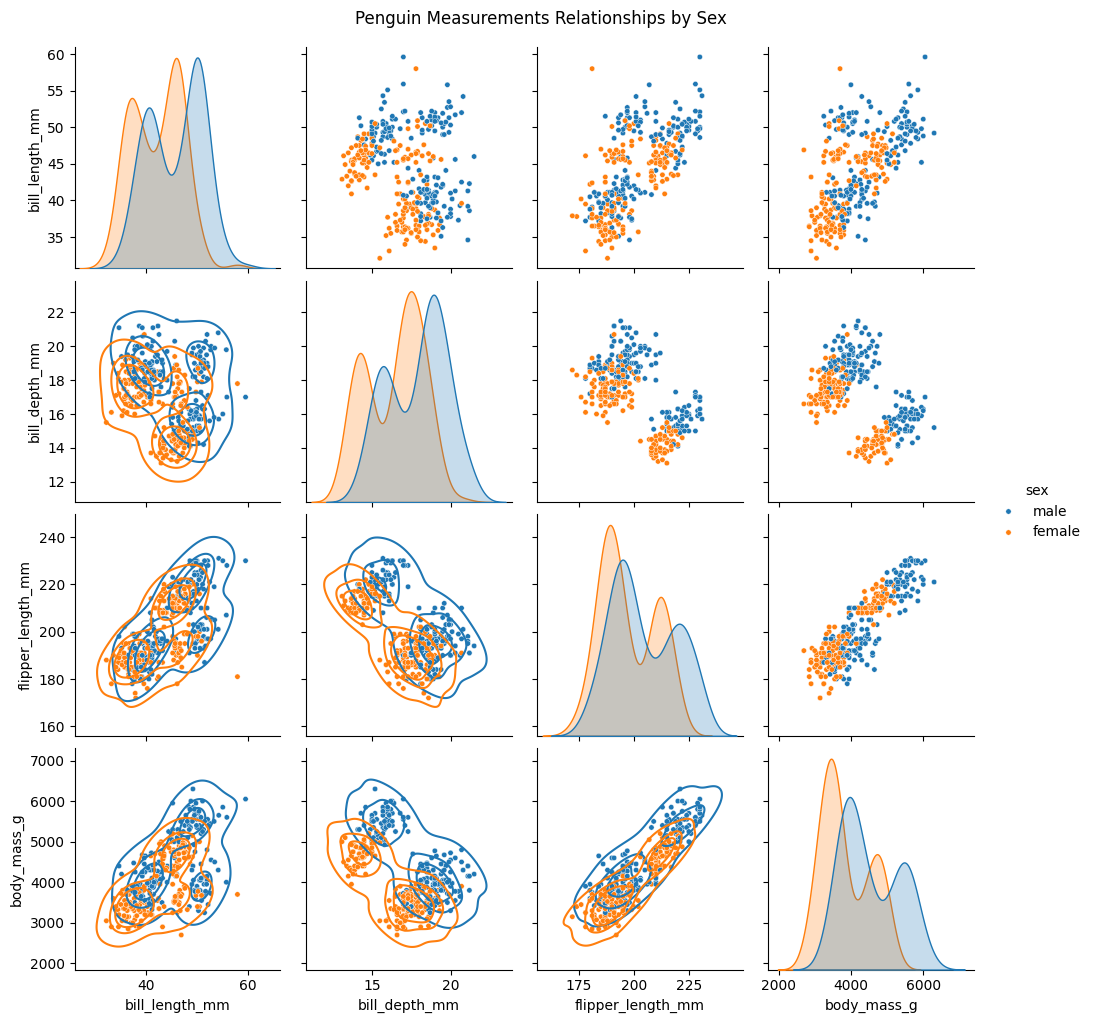

In [30]:
plt.figure(figsize=(10, 6))
g = sns.pairplot(df[df.sex != 'undefined'], hue='sex', vars=measurements, plot_kws={'s': 15})  # Reduced point size
g.map_lower(sns.kdeplot, levels=4)
plt.suptitle('Penguin Measurements Relationships by Sex', y=1.02)

plt.show()

Here we see an interesting pattern where the male and female distributions appear almost identical, with males having a slightly higher mean for each measurement.

<Figure size 1000x600 with 0 Axes>

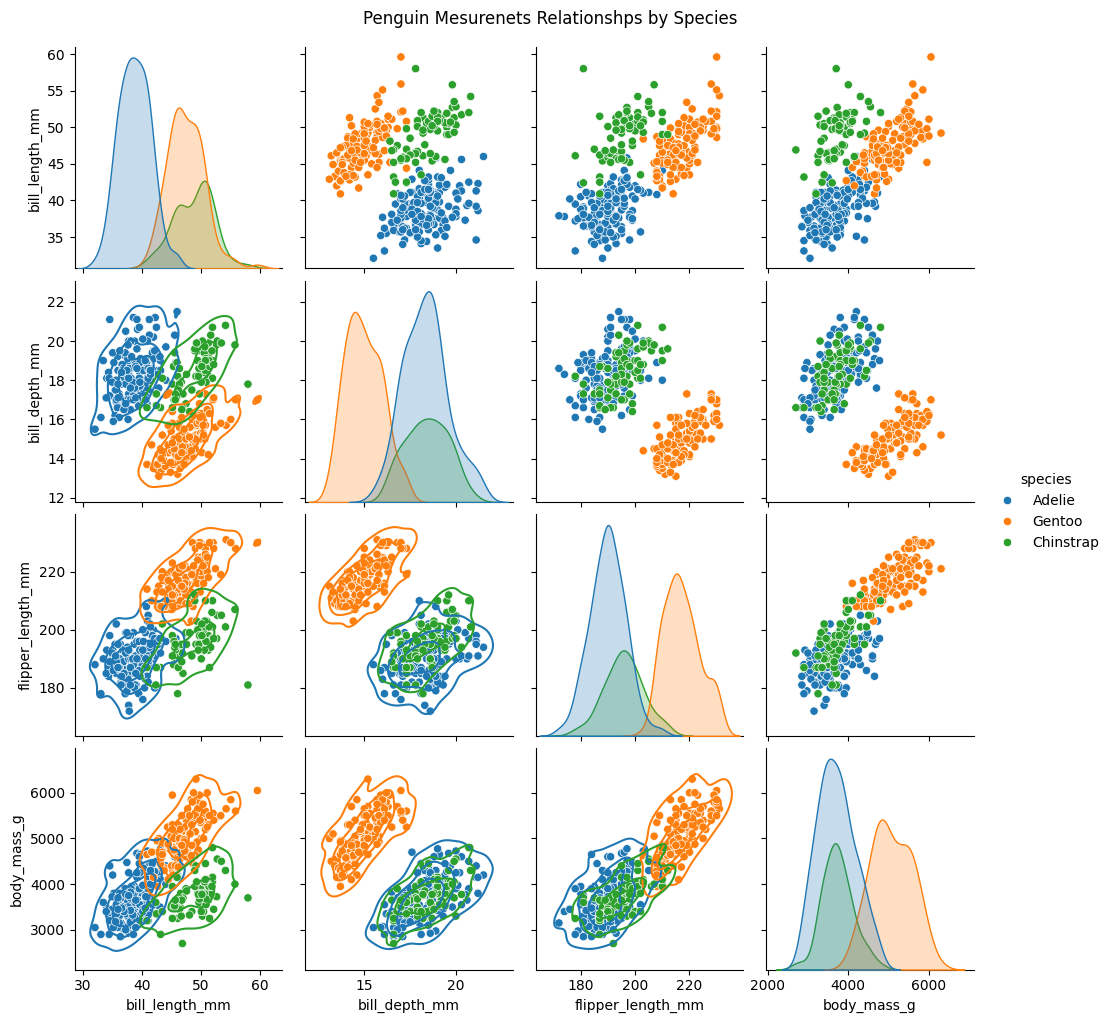

In [31]:
plt.figure(figsize=(10, 6))
g= sns.pairplot(df, hue='species', vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
g.map_lower(sns.kdeplot, levels=4, color=".2")

plt.suptitle('Penguin Mesurenets Relationshps by Species', y=1.02)
plt.show()

Here we can see that Adelie and Gento have remarkably similar distributions for all mesurements except the bill lenght. \
On the other hand, Gentoo significantly differs from other species on every mesurement except bill lenght.

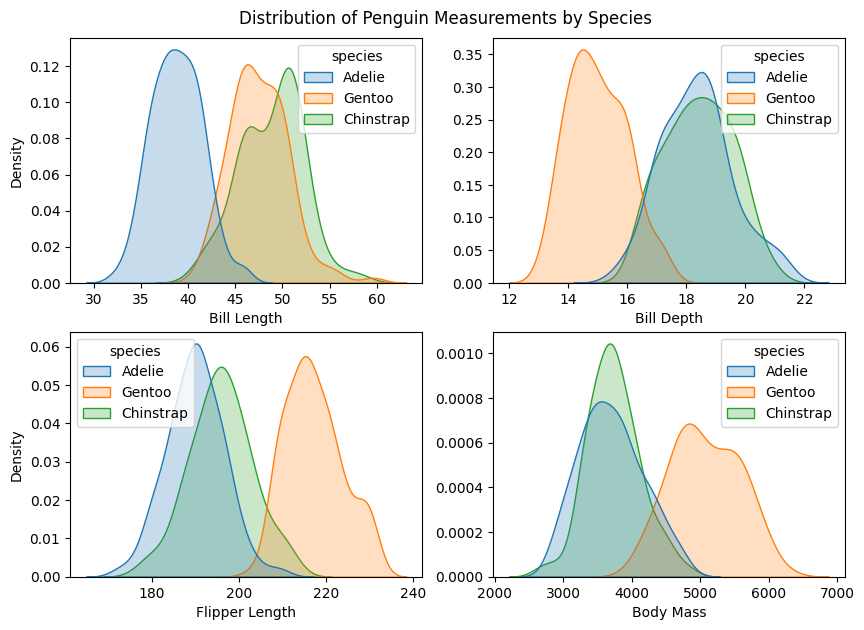

In [32]:
# Let's take a close look at the distribution of measurements by species
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle('Distribution of Penguin Measurements by Species', y=0.92)

measurements = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
xlabels = ['Bill Length', 'Bill Depth', 'Flipper Length', 'Body Mass']
axes_flat = axes.flatten()

for i, ax in enumerate(axes_flat):
    # We will use kdeplot with common_norm=False so the area under the curve will be equal for each species
    # regardless of the number of samples
    sns.kdeplot(data=df, x=measurements[i], hue='species', ax=ax, fill=True, common_norm=False, legend=True)
    
    ax.set_xlabel(xlabels[i])
    if i % 2 == 1:
        ax.set_ylabel('')
    else:
        ax.set_ylabel('Density')

plt.show()


Here we can see these relationships more pronounced 